## Import Modules

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# from sklearn.preprocessing import StandardScaler
# from sklearn.linear_model import LogisticRegression
# from sklearn.model_selection import train_test_split, RandomizedSearchCV
# from sklearn import metrics

## Initializing Train and Test

In [5]:
train=pd.read_csv(r"C:\Users\SRI DATES\Downloads\train.csv") 
test=pd.read_csv(r"C:\Users\SRI DATES\Downloads\test.csv")

In [ ]:
train_original=train.copy() 
test_original=test.copy()

## Checking the data types and data shape or size

In [6]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [7]:
train.shape, test.shape

((614, 13), (367, 12))

## Explanatory Data Analysis (EDA)

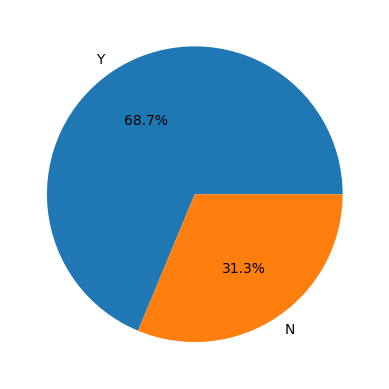

In [9]:
temp = train['Loan_Status'].value_counts()
plt.pie(temp.values,
        labels=temp.index,
        autopct='%1.1f%%')
plt.show()

## Univariate Analysis

## Target Variable

In [10]:
train['Loan_Status'].value_counts()

Loan_Status
Y    422
N    192
Name: count, dtype: int64

In [11]:
# Normalize can be set to True to print proportions instead of number
train['Loan_Status'].value_counts(normalize=True)

Loan_Status
Y    0.687296
N    0.312704
Name: proportion, dtype: float64

<Axes: xlabel='Loan_Status'>

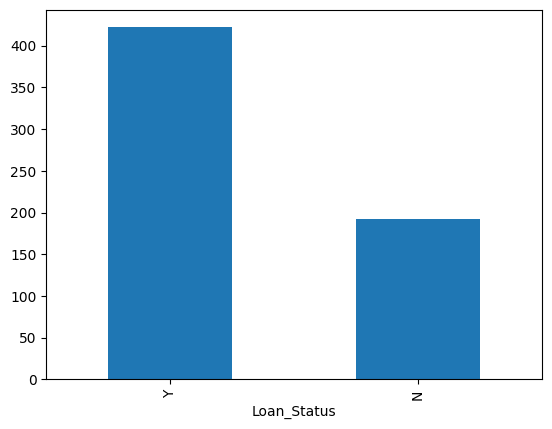

In [12]:
train['Loan_Status'].value_counts().plot.bar()

## Categorical independent variable

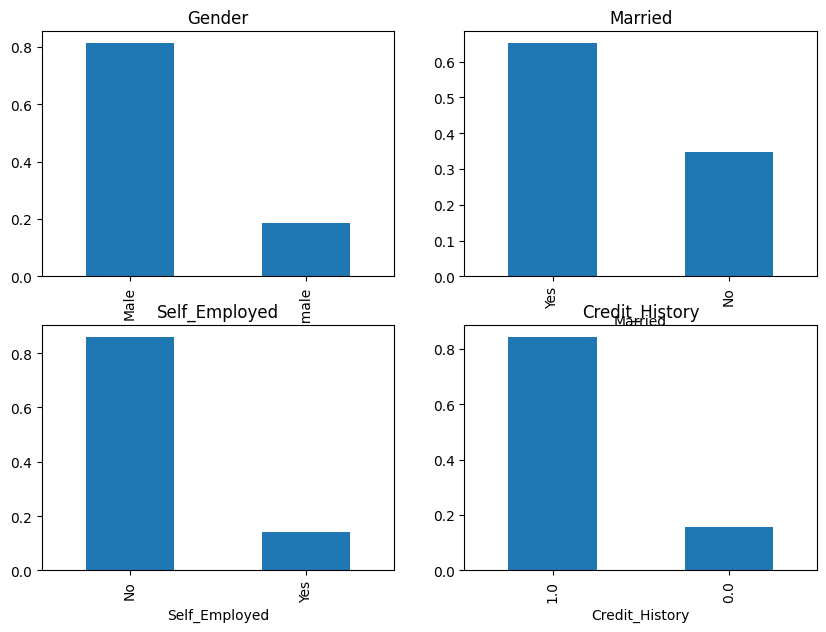

In [13]:
plt.figure(1) 
plt.subplot(221) 
train['Gender'].value_counts(normalize=True).plot.bar(figsize=(10,7), title= 'Gender') 
plt.subplot(222) 
train['Married'].value_counts(normalize=True).plot.bar(title= 'Married') 
plt.subplot(223) 
train['Self_Employed'].value_counts(normalize=True).plot.bar(title= 'Self_Employed') 
plt.subplot(224) 
train['Credit_History'].value_counts(normalize=True).plot.bar(title= 'Credit_History') 
plt.show()


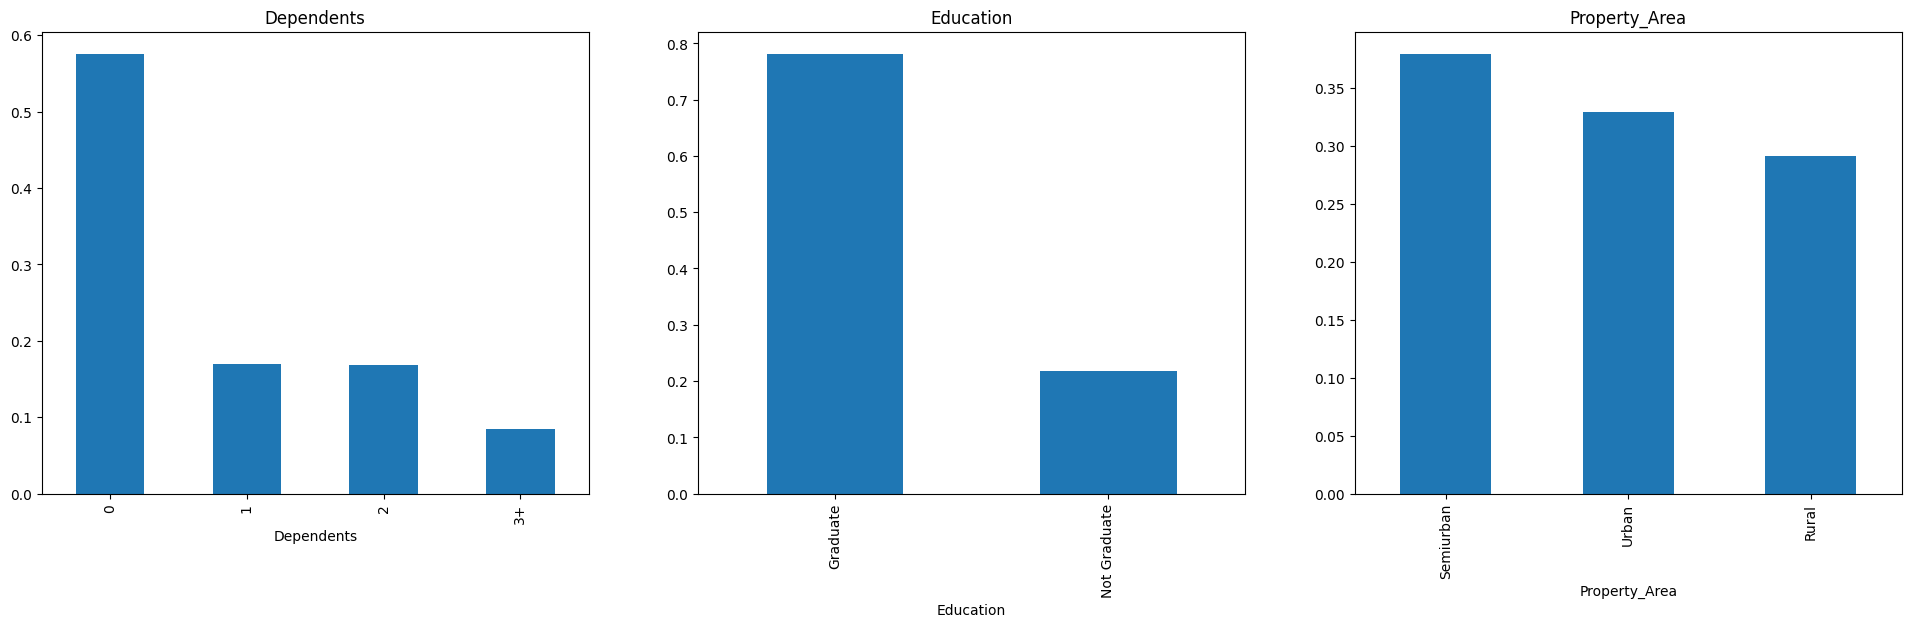

In [14]:
plt.figure(1) 
plt.subplot(131)
train['Dependents'].value_counts(normalize=True).plot.bar(figsize=(24,6),title='Dependents') 
plt.subplot(132)
train['Education'].value_counts(normalize=True).plot.bar(title= 'Education') 
plt.subplot(133) 
train['Property_Area'].value_counts(normalize=True).plot.bar(title= 'Property_Area') 
plt.show()

<Axes: xlabel='Loan_Status'>

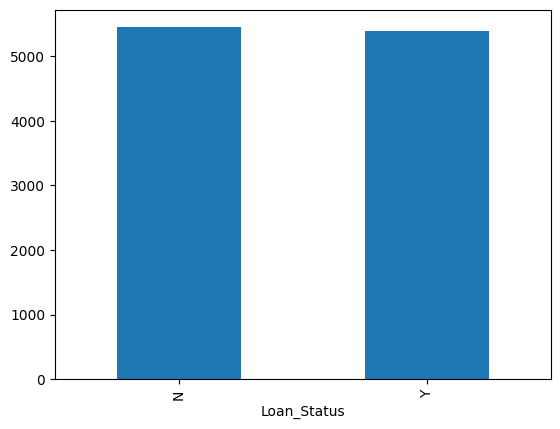

In [15]:
train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

## Independent Variable (Numerical)

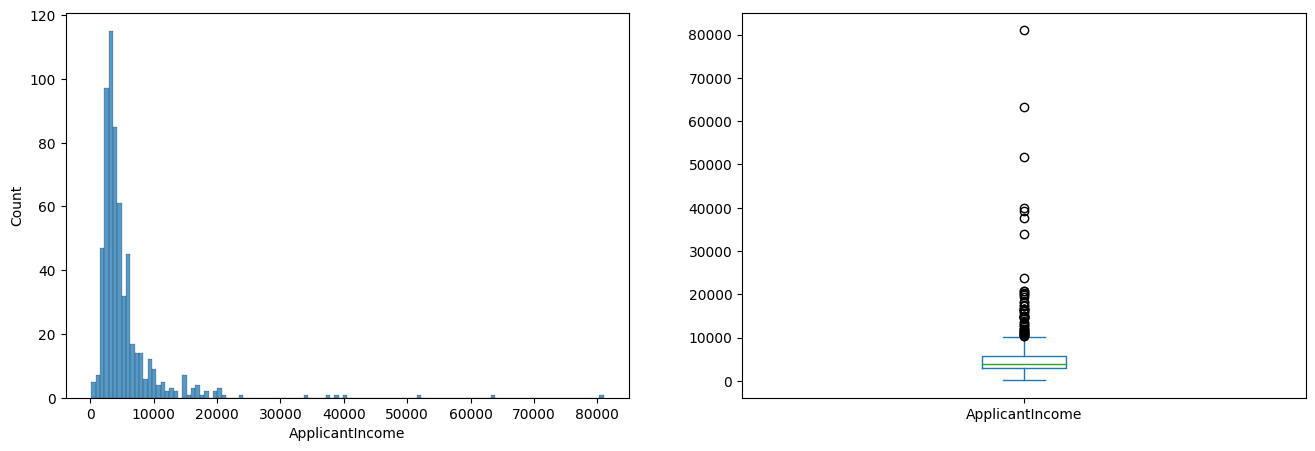

In [18]:
plt.figure(1)
plt.subplot(121) 
sns.histplot(train['ApplicantIncome']); 
plt.subplot(122) 
train['ApplicantIncome'].plot.box(figsize=(16,5)) 
plt.show()

## Bivariate Analysis

## Categorical Independent Variable vs Target Variable

<Axes: xlabel='Gender'>

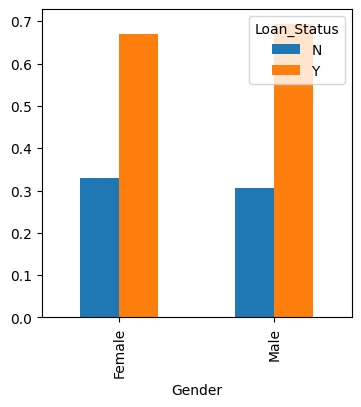

In [20]:
Gender=pd.crosstab(train['Gender'],train['Loan_Status']) 
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar", figsize=(4,4))

## visualize the remaining categorical variables vs the target variables

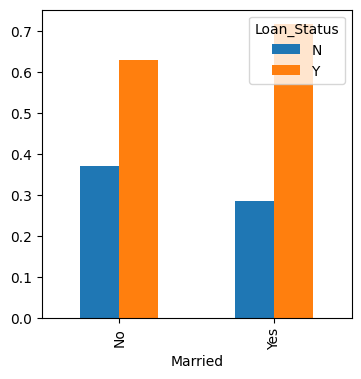

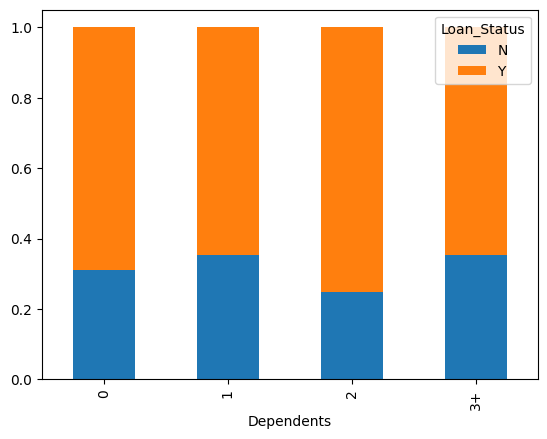

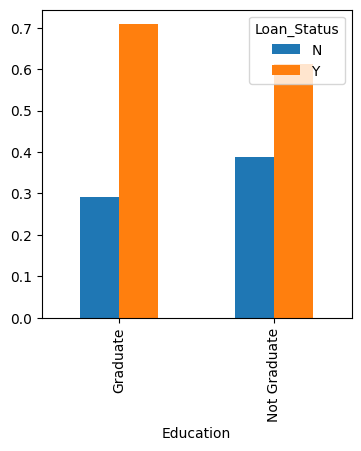

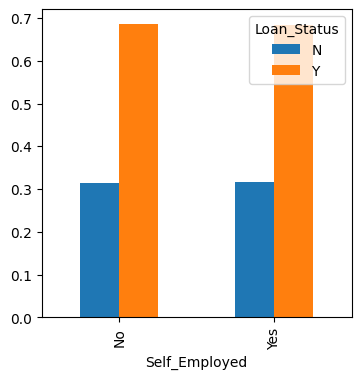

In [21]:
Married=pd.crosstab(train['Married'],train['Loan_Status']) 
Dependents=pd.crosstab(train['Dependents'],train['Loan_Status']) 
Education=pd.crosstab(train['Education'],train['Loan_Status']) 
Self_Employed=pd.crosstab(train['Self_Employed'],train['Loan_Status']) 
Married.div(Married.sum(1).astype(float), axis=0).plot(kind="bar", figsize=(4,4)) 
plt.show() 
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.show() 
Education.div(Education.sum(1).astype(float), axis=0).plot(kind="bar", figsize=(4,4)) 
plt.show() 
Self_Employed.div(Self_Employed.sum(1).astype(float),axis=0).plot(kind="bar",figsize=(4,4))
plt.show()

## Relationship between the remaining categorical independent variables and Loan_Status.

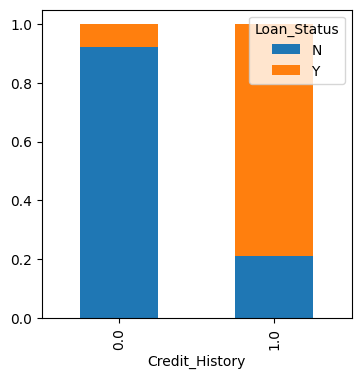

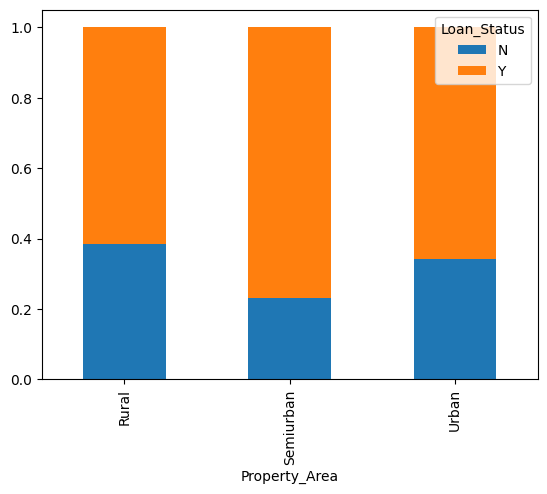

In [50]:
Credit_History=pd.crosstab(train['Credit_History'],train['Loan_Status']) 
Property_Area=pd.crosstab(train['Property_Area'],train['Loan_Status']) 
Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4)) 
plt.show() 
Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.show()

## Numerical Independent Variable vs Target Variable

<Axes: xlabel='Loan_Status'>

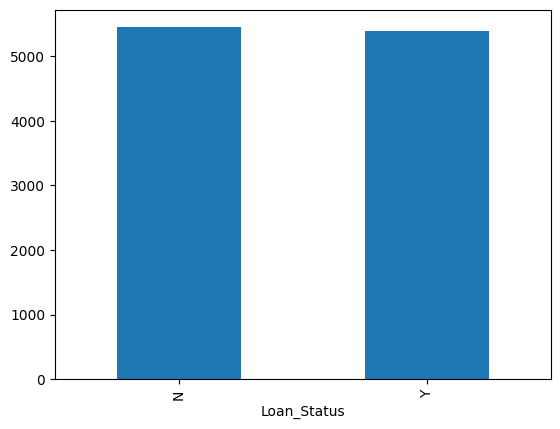

In [51]:
train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

## Missing Value and Outlier Treatment

In [52]:
train.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
LoanAmount_log       22
dtype: int64

In [53]:
train['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
train['Married'].fillna(train['Married'].mode()[0], inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)

In [54]:
train.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
LoanAmount_log       22
dtype: int64

In [55]:
train['Loan_Amount_Term'].value_counts()

Loan_Amount_Term
360.0    526
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64

In [56]:
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)

In [57]:
train.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
LoanAmount_log       22
dtype: int64

In [58]:
train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

In [59]:
train.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
LoanAmount_log       22
dtype: int64

In [60]:
test['Gender'].fillna(train['Gender'].mode()[0], inplace=True) 
test['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True) 
test['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True) 
test['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True) 
test['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True) 
test['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

In [61]:
test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
LoanAmount_log       5
dtype: int64

## Outlier Treatment

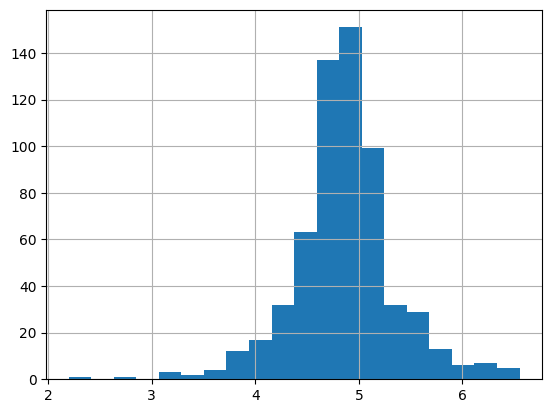

In [62]:
train['LoanAmount_log'] = np.log(train['LoanAmount']) 
train['LoanAmount_log'].hist(bins=20) 
test['LoanAmount_log'] = np.log(test['LoanAmount'])

C:\Users\SRI DATES\AppData\Local\Temp\ipykernel_3632\3394585222.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, i+1)


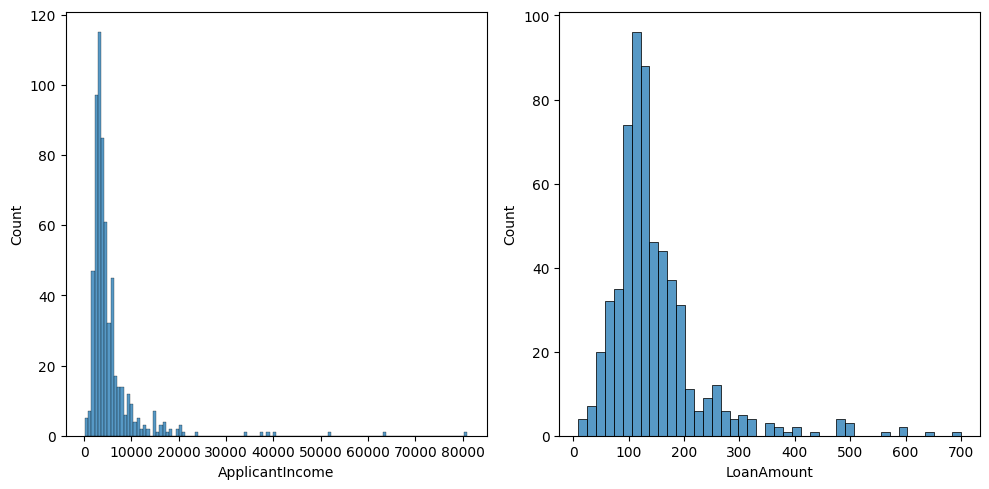

In [42]:
plt.subplots(figsize=(10, 5))
for i, col in enumerate(['ApplicantIncome', 'LoanAmount']):
    plt.subplot(1, 2, i+1)
    sns.histplot(train[col])
plt.tight_layout()
plt.show()

## Feature Engineering

In [ ]:
# from sklearn.preprocessing import StandardScaler

# std = StandardScaler()
# x_train = std.fit_transform(x_train)
# x_test = std.transform(x_test)

## Model Training

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from sklearn import preprocessing


dfT = train #encode the data - one hot encoding is done

label_encoder = preprocessing.LabelEncoder()
dfT['Property_Area']= label_encoder.fit_transform(dfT['Property_Area'])
dfT['Property_Area'].unique()


dfT["Gender"] = dfT["Gender"].map({"Male" : 0, "Female" : 1})
dfT["Married"] = dfT["Married"].map({"Yes" : 1, "No" : 0})
dfT["Dependents"] = dfT["Dependents"].map({"0" : 0, "1" : 1,"2" : 2,"3+" : 3})
dfT["Education"] = dfT["Education"].map({"Graduate" : 1, "Not Graduate" : 0})
dfT["Self_Employed"] = dfT["Self_Employed"].map({"Yes" : 1, "No" : 0})
#dfT = pd.get_dummies(dfT,columns = ["Property_Area"]) #one hot encoding
dfT["Loan_Status"] = dfT["Loan_Status"].map({"Y" : 1, "N" : 0})


#split dataset
x_train, x_test, y_train, y_test = train_test_split(dfT[dfT.columns[:-1]].v

In [ ]:
dfT

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
random_forest = RandomForestClassifier()
random_forest.fit(x_train, y_train)
y_pred = random_forest.predict(x_test)
print(classification_report(y_test, y_pred, target_names=['Y', 'N']))

## Max Voting

In [ ]:
from sklearn.ensemble import VotingClassifier # this is the function that ensembles my model
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score

model1 = LogisticRegression(random_state=1)
model2 = tree.DecisionTreeClassifier(random_state=1)
model3 = KNeighborsClassifier(3)
model = VotingClassifier(estimators=[('lr', model1), ('dt', model2),('knn',model3)], voting='soft') # it will stitich all the models together, voting = hard means max voting 
# we need to give the list of models that we are trying to combine
model.fit(x_train,y_train) # to train all of the models
preds = model.predict(x_test)
model.score(x_test,y_test) # prediction
roc_auc_score(y_test,model.predict_proba(x_test)[:,1])

In [ ]:
from sklearn import preprocessing

dfT1= test 
dfT1

label_encoder = preprocessing.LabelEncoder()
dfT1['Property_Area']= label_encoder.fit_transform(dfT1['Property_Area'])
dfT1['Property_Area'].unique()

In [ ]:
dfT1= test #encode the data - one hot encoding is done

dfT1["Gender"] = dfT1["Gender"].map({"Male" : 0, "Female" : 1})
dfT1["Married"] = dfT1["Married"].map({"Yes" : 1, "No" : 0})
dfT1["Dependents"] = dfT1["Dependents"].map({"0" : 0, "1" : 1,"2" : 2,"3+" : 3})
dfT1["Education"] = dfT1["Education"].map({"Graduate" : 1, "Not Graduate" : 0})
dfT1["Self_Employed"] = dfT1["Self_Employed"].map({"Yes" : 1, "No" : 0})
#dfT1 = pd.get_dummies(dfT1,columns = ["Property_Area"]) #one hot encoding
#dfT1["Loan_Status"] = dfT1["Loan_Status"].map({"Y" : 1, "N" : 0})

dfT1

In [ ]:
pred_test = model3.predict(test)

In [ ]:
submission=pd.read_csv(r"C:\Users\sri dates\sample_submission.csv)

In [ ]:
submission['Loan_Status']=pred_test 
submission['Loan_ID']=test_original['Loan_ID']

In [ ]:
submission['Loan_Status'].replace(0, 'N',inplace=True) 
submission['Loan_Status'].replace(1, 'Y',inplace=True)
# submission.drop(header= False, axis=0, inplace=True)

In [ ]:
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv(r"C:\Users\sri dates\sample_submission.csv",index=False)
 